# Exercice de classification NASA

## Jeu de Données : Objets Géocroiseurs (1910-2024)

Ce projet utilise le jeu de données **Nearest Earth Objects (1910-2024)]** qui recense les observations d'**astéroïdes et comètes** passant à proximité de la Terre entre 1910 et 2024. Ces objets, appelés **géocroiseurs** (*Near-Earth Objects*, NEOs), sont suivis par les agences spatiales en raison de leur potentiel risque d'impact avec notre planète.

### **Objectif du Projet**
Développer un **modèle de classification** capable de prédire si un objet géocroiseur est :
- **Dangereux** (risque potentiel d'impact ou de proximité critique).
- **Non dangereux** (trajectoire sans risque pour la Terre).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
# !pip install kagglehub

In [13]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("ivansher/nasa-nearest-earth-objects-1910-2024")

print("Path to dataset files:", path)

Path to dataset files: /home/yohan/.cache/kagglehub/datasets/ivansher/nasa-nearest-earth-objects-1910-2024/versions/2


In [14]:
# Trouve automatiquement le CSV présent dans le dossier
file = [f for f in os.listdir(path) if f.endswith(".csv")][0]

df = pd.read_csv(os.path.join(path, file))
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [15]:
# df = pd.read_csv("nearest-earth-objects(1910-2024).csv")

In [45]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [46]:
categories_uniques = df["neo_id"].unique()
print(len(categories_uniques))
categories_uniques = df["name"].unique()
print(len(categories_uniques))

33514
33514


Un **premier examen** des données révèle des **disparités dans le nombre de valeurs** entre les colonnes. Cela indique la présence de **valeurs manquantes (NaN)**, qui devront être traitées avant toute analyse ou modélisation.

### Nettoyage des données

In [3]:
df.isna().any().any()

np.True_

In [4]:
df.isna().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [5]:
df_clean = df.copy().dropna()

Étant donné le **faible nombre de lignes concernées** par les valeurs manquantes, la solution la plus **simple et efficace** consiste à **supprimer ces entrées**.

## Visualisation des données

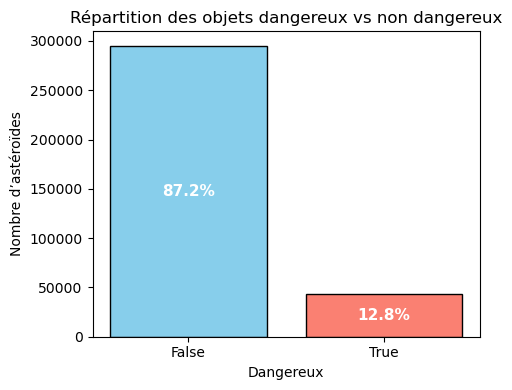

In [8]:
counts = df_clean["is_hazardous"].value_counts()
total = counts.sum()
percentages = (counts / total) * 100

plt.figure(figsize=(5,4))
bars = plt.bar(counts.index.astype(str), counts.values, color=["skyblue", "salmon"], edgecolor="black")
plt.title("Répartition des objets dangereux vs non dangereux")
plt.xlabel("Dangereux")
plt.ylabel("Nombre d’astéroïdes")
plt.xticks([0, 1], ["False", "True"], rotation=0)

# Ajouter les pourcentages *dans* les barres
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # centré horizontalement
        height / 2,                         # position verticale au milieu de la barre
        f"{percentages.iloc[i]:.1f}%",      # pourcentage formaté
        ha="center", va="center", fontsize=11, color="white", fontweight="bold"
    )

plt.tight_layout()
plt.show()

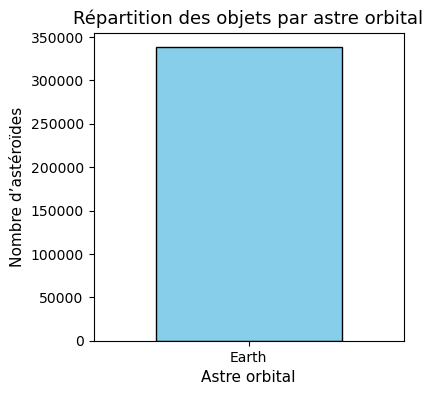

In [10]:
counts = df_clean["orbiting_body"].value_counts()

plt.figure(figsize=(max(4, len(counts) * 1.2), 4))  # largeur ajustée dynamiquement

bars = plt.bar(counts.index, counts.values, color="skyblue", edgecolor="black", width=0.6)

plt.title("Répartition des objets par astre orbital", fontsize=13)
plt.xlabel("Astre orbital", fontsize=11)
plt.ylabel("Nombre d’astéroïdes", fontsize=11)


if len(counts) == 1:
    plt.xlim(-0.5, 0.5)
    plt.xticks([0], counts.index)

plt.show()

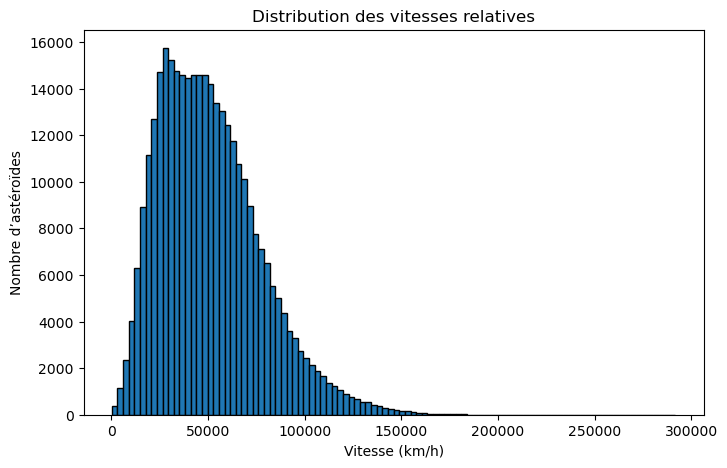

In [11]:
plt.figure(figsize=(8,5))
plt.hist(df_clean["relative_velocity"], bins=100, edgecolor="black")
plt.title("Distribution des vitesses relatives")
plt.xlabel("Vitesse (km/h)")
plt.ylabel("Nombre d’astéroïdes")
plt.show()

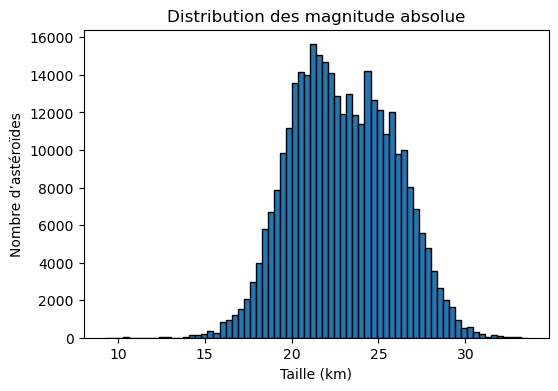

In [12]:
plt.figure(figsize=(6,4))
plt.hist(df_clean["absolute_magnitude"], bins=70, edgecolor="black")
plt.title("Distribution des magnitude absolue")
plt.xlabel("Taille (km)")
plt.ylabel("Nombre d’astéroïdes")
plt.show()

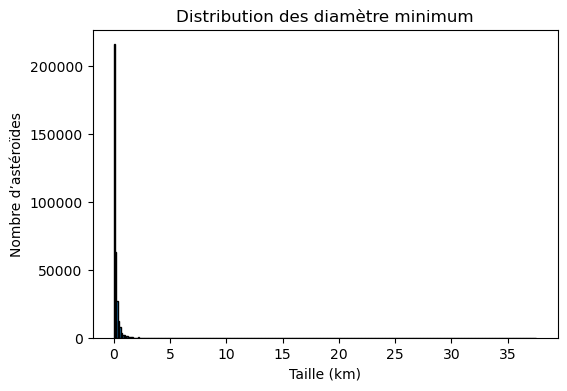

In [89]:
plt.figure(figsize=(6,4))
plt.hist(df_clean["estimated_diameter_min"], bins=300, edgecolor="black")
plt.title("Distribution des diamètre minimum")
plt.xlabel("Taille (km)")
plt.ylabel("Nombre d’astéroïdes")
plt.show()

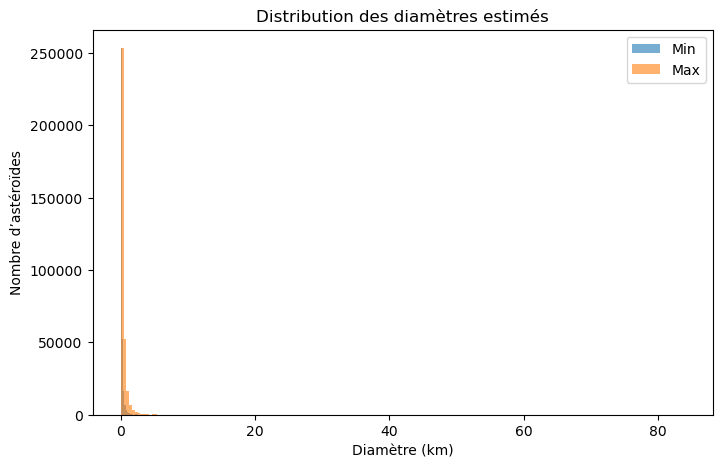

In [90]:
plt.figure(figsize=(8,5))
plt.hist(df_clean["estimated_diameter_min"], bins=200, alpha=0.6, label="Min")
plt.hist(df_clean["estimated_diameter_max"], bins=200, alpha=0.6, label="Max")
plt.title("Distribution des diamètres estimés")
plt.xlabel("Diamètre (km)")
plt.ylabel("Nombre d’astéroïdes")
plt.legend()
plt.show()

Text(0, 0.5, 'estimated_diameter_max')

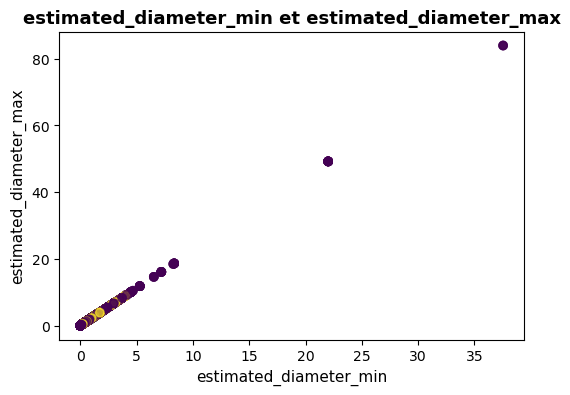

In [91]:
col_x = df_clean.columns[3]
col_y = df_clean.columns[4]

# Création du scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(df[col_x], df[col_y], alpha=0.7, c=df['is_hazardous'])

# Titres et labels
plt.title(f"{col_x} et {col_y}", fontsize=13, fontweight="bold")
plt.xlabel(col_x, fontsize=11)
plt.ylabel(col_y, fontsize=11)

Nombre d’astéroïdes retenus : 338156


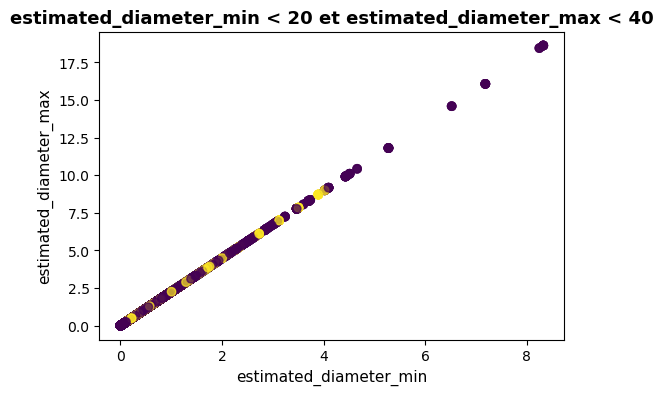

In [92]:
col_x = df_clean.columns[3]
col_y = df_clean.columns[4]

filtered_df = df[(df[col_x] < 20) & (df[col_y] < 40)]

print(f"Nombre d’astéroïdes retenus : {len(filtered_df)}")

plt.figure(figsize=(6, 4))
plt.scatter(filtered_df[col_x], filtered_df[col_y], alpha=0.7, c=filtered_df['is_hazardous'])

plt.title(f"{col_x} < 20 et {col_y} < 40", fontsize=13, fontweight="bold")
plt.xlabel(col_x, fontsize=11)
plt.ylabel(col_y, fontsize=11)
plt.show()

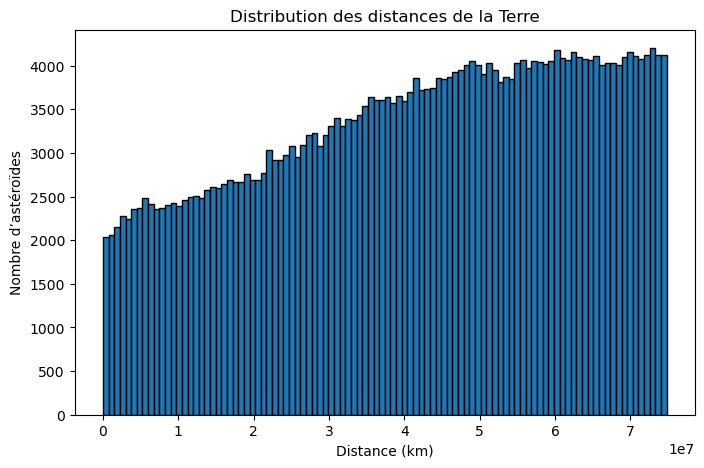

In [93]:
plt.figure(figsize=(8,5))
plt.hist(df_clean["miss_distance"], bins=100, edgecolor="black")
plt.title("Distribution des distances de la Terre")
plt.xlabel("Distance (km)")
plt.ylabel("Nombre d’astéroïdes")
plt.show()

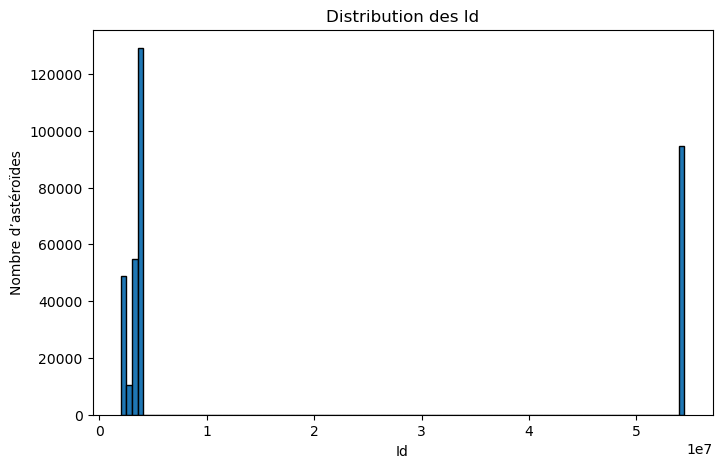

In [28]:
plt.figure(figsize=(8,5))
plt.hist(df_clean["neo_id"], bins=100, edgecolor="black")
plt.title("Distribution des Id")
plt.xlabel("Id")
plt.ylabel("Nombre d’astéroïdes")
plt.show()

Text(0, 0.5, 'relative_velocity')

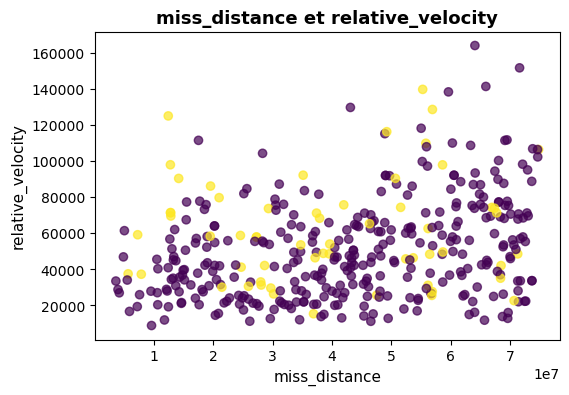

In [94]:
df_min = df_clean.head(400)
plt.figure(figsize=(6, 4))
plt.scatter(df_min["miss_distance"], df_min["relative_velocity"], alpha=0.7, c=df_min['is_hazardous'])

plt.title(f"{"miss_distance"} et {"relative_velocity"}", fontsize=13, fontweight="bold")
plt.xlabel("miss_distance", fontsize=11)
plt.ylabel("relative_velocity", fontsize=11)

Il faut déterminer s'il est possible d'inclure neo_id ou alors si cela peut être considéré comme du data leaking. En effet, il y a 33514 objets suivis sur une longue période de temps et donc l'un d'eux peut être vu lors de l'entrainement et lors du test.

Premier neo_id avec au moins 100 points : 2277810


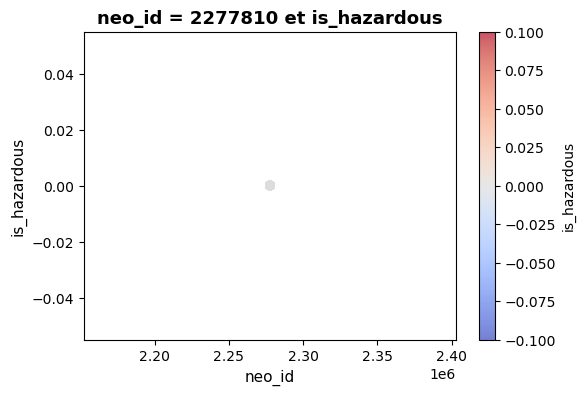

In [57]:
counts = df_clean['neo_id'].value_counts()
neo_id_100 = counts[counts >= 100].index[0]
print(f"Premier neo_id avec au moins 100 points : {neo_id_100}")
df_filtre = df_clean[df_clean['neo_id'] == neo_id_100]
df_filtre_100 = df_filtre.head(100)

plt.figure(figsize=(6, 4))
plt.scatter(df_filtre["neo_id"], df_filtre["is_hazardous"],
            alpha=0.7, c=df_filtre['is_hazardous'], cmap='coolwarm')

plt.title(f"neo_id = {neo_id_100} et is_hazardous", fontsize=13, fontweight="bold")
plt.xlabel("neo_id", fontsize=11)
plt.ylabel("is_hazardous", fontsize=11)
plt.colorbar(label='is_hazardous')
plt.show()

`neo_id` n'est pas un indicateur de la nature de l'astéroide, mais il peut être responsable de fuite de données. Il ne faut donc pas le prendre en compte lors de l'analyse.

In [31]:
import seaborn as sns

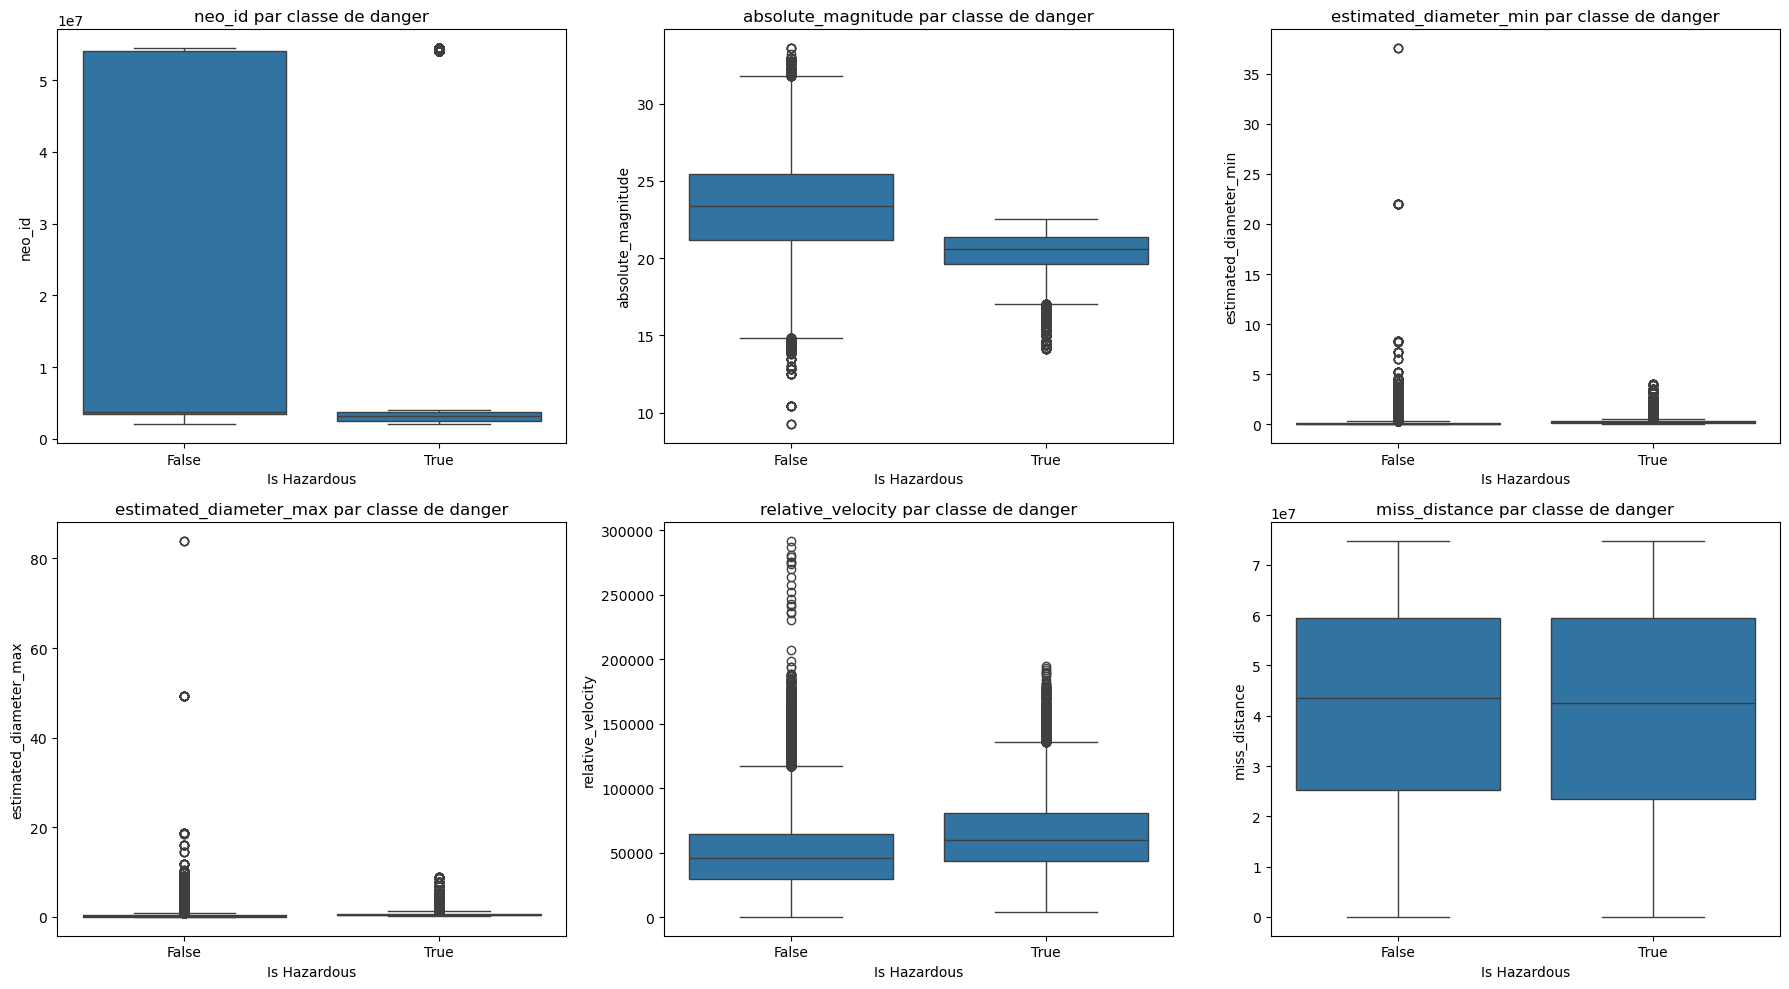

In [35]:
features = df.select_dtypes(include=['float64', 'int64']).columns

# Create a 2x3 grid of subplots for visual comparison
plt.figure(figsize=(18, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='is_hazardous', y=feature, data=df)
    plt.title(f'{feature} par classe de danger')
    plt.xlabel('Is Hazardous')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

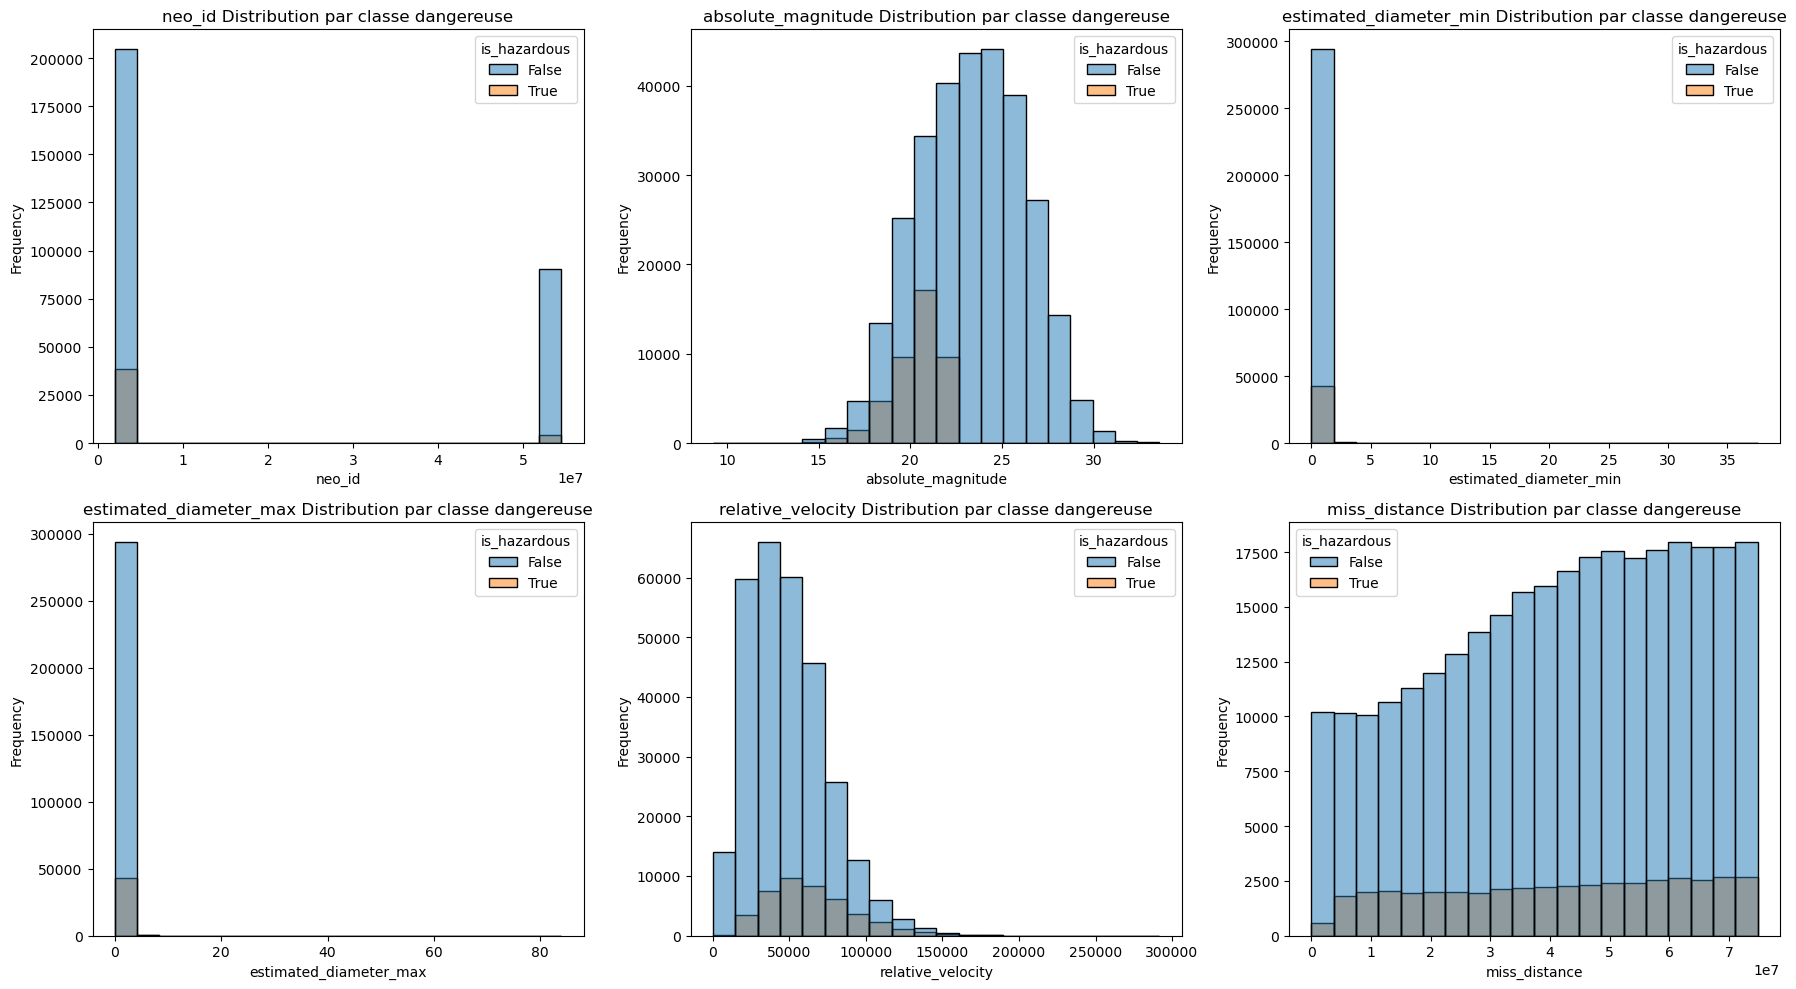

In [34]:
plt.figure(figsize=(18, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=feature, hue='is_hazardous', bins=20)
    plt.title(f'{feature} Distribution par classe dangereuse')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Séparation des variables X et y

In [6]:
X = df_clean.drop(columns=["neo_id", "name", "is_hazardous","orbiting_body"])
y = df_clean["is_hazardous"]

Il a été décidé de retirer 'orbiting_body' car cette colonne n'apporte pas d'information. En effet, elle est commune avec toutes les instances de cette base de données.

In [91]:
print(f"Taille de la matrice X :{np.shape(X)}")
print(f"Taille de la matrice y :{np.shape(y)}")

Taille de la matrice X :(338171, 5)
Taille de la matrice y :(338171,)


In [7]:
from sklearn.model_selection import train_test_split

# Réduction du dataset à 30% du total
X_small, _, y_small, _ = train_test_split(X, y, train_size=0.3, random_state=42, stratify=y) # garde les proportions avec le stratify

In [93]:
np.shape(X_small)

(101451, 5)

In [94]:
np.shape(y_small)

(101451,)

## Premiers essais

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [10]:
# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, random_state=42, stratify=y_small)  # stratify

              precision    recall  f1-score   support

       False       0.88      0.99      0.93     17701
        True       0.52      0.07      0.13      2590

    accuracy                           0.87     20291
   macro avg       0.70      0.53      0.53     20291
weighted avg       0.83      0.87      0.83     20291

Valeur d'AUC :0.5322589697286043


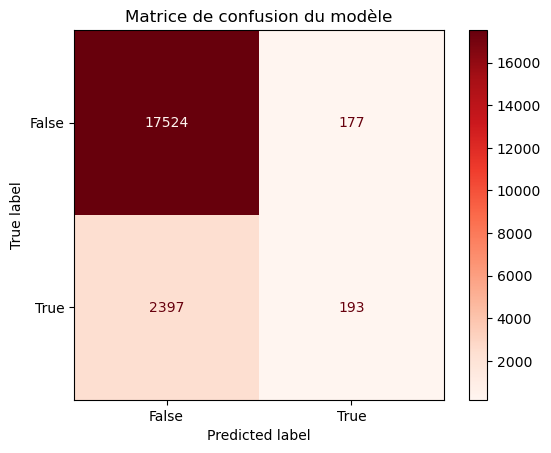

In [11]:
# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),          # Normalisation
    ('clf', LogisticRegression(max_iter=1000))  # Modèle simple
])

# Entraînement
pipeline.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Valeur d'AUC :{roc_auc_score(y_test, y_pred)}")

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])
disp.plot(cmap="Reds")
plt.title("Matrice de confusion du modèle")
plt.show()

La performance de recall est très médiocre. Le modèle ne parvient pas à identifier les objects classés comme dangereux

### Visualisation des données dans un espace 2D

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

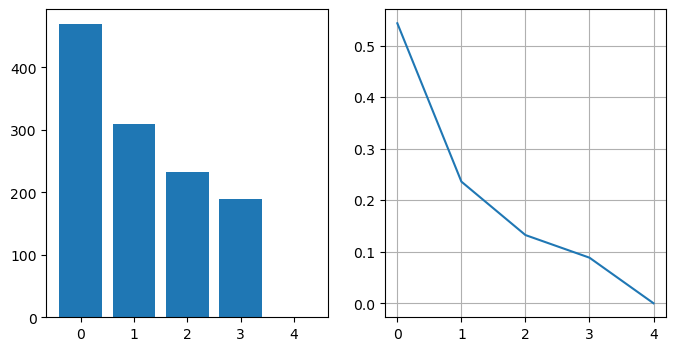

In [66]:
from sklearn.decomposition import PCA
# application de la PCA

pca = PCA()
pca.fit(X_train_scaled)  # calcul des valeurs propres, vecteurs propres

plt.figure(facecolor='white', figsize=[8,4])
plt.subplot(1,2,1)
plt.bar(np.arange(X_train.shape[1]), pca.singular_values_)
plt.subplot(1,2,2)
plt.plot(pca.explained_variance_ratio_)
plt.grid()

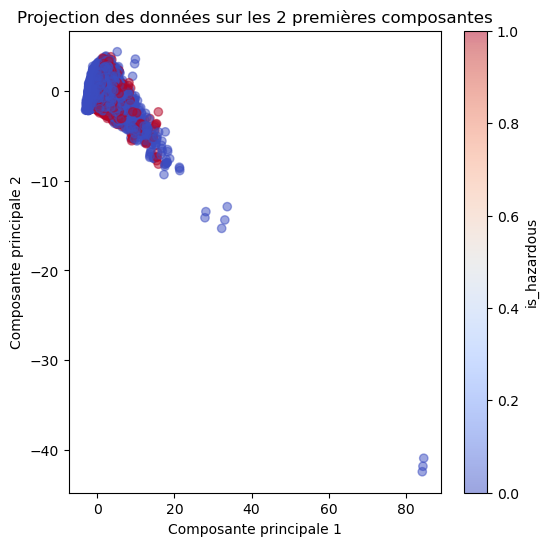

In [67]:
X_pca = pca.transform(X_train_scaled)

plt.figure(figsize=(6,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train.map({False:0, True:1}), cmap='coolwarm', alpha=0.5)
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Projection des données sur les 2 premières composantes")
plt.colorbar(label="is_hazardous")
plt.show()

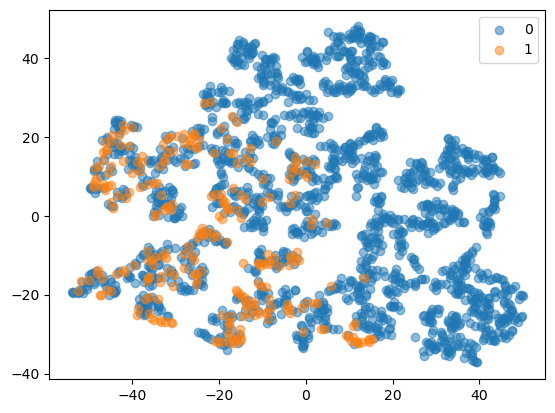

In [68]:
from sklearn.manifold import TSNE

N = 2000
Xur = X_train_scaled[:N]
Yur = y_train[:N]

visu = TSNE() # paramètres par défaut
x2d = visu.fit_transform(Xur)

plt.figure(facecolor="white")
for y in np.unique(Yur):
    plt.scatter(x2d[Yur==y,0], x2d[Yur==y,1], alpha=0.5)
plt.legend(np.arange(10))

On voit qu'il y a une séparation difficile entre les objects définis comme dangereux et ceux qui ne le sont pas. 

In [69]:
# pip install umap-learn

/home/yohan/miniconda3/envs/tuto/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


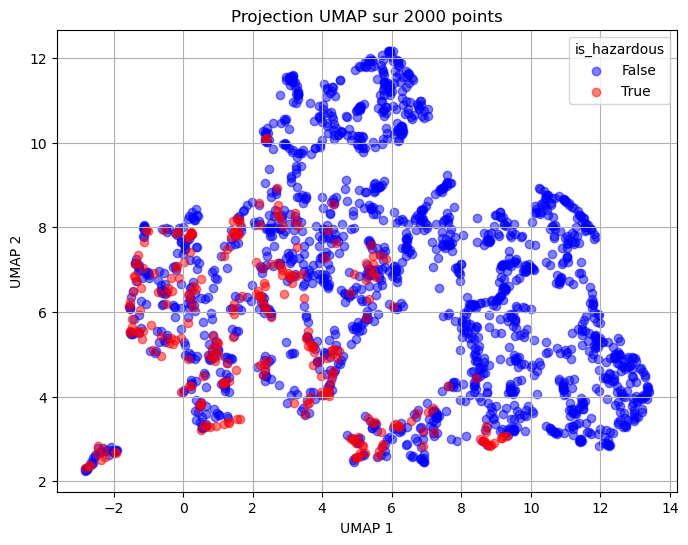

In [70]:
import umap

N = 2000
Xur = X_train_scaled[:N]
Yur = y_train[:N]

umap_model = umap.UMAP(n_components=2, random_state=42)
x2d = umap_model.fit_transform(Xur)

# Visualisation
plt.figure(figsize=(8,6), facecolor="white")

classes = np.unique(Yur)
colors = ['blue', 'red']  # Couleurs pour chaque classe

for i, y in enumerate(classes):
    plt.scatter(x2d[Yur==y,0], x2d[Yur==y,1], alpha=0.5, color=colors[i], label=str(y))

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title(f"Projection UMAP sur {N} points")
plt.legend(title="is_hazardous")
plt.grid(True)
plt.show()

Avec t-sne, l'ACP et UMAP, il ne semble pas y avoir de séparations claires entre les astéroïdes dangereux et les non dangereux. Nous ne pouvons en conclure pour identifier une statégie de séparation entre les 2 classes.

### Choix des modèles 

In [11]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

Afin de mieux entrainer les modèles, on utilise l'option `'balanced'` dans les poids de classe de modèles.

In [14]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced'),
     # 'SVM': SVC(probability=True, class_weight='balanced', kernel='rbf'),  # Activation du calcul de probabilité
    'Ridge': RidgeClassifier(class_weight='balanced'),
    'ElasticNet': SGDClassifier(
        loss='log_loss',
        penalty='elasticnet',  
        alpha=0.0001,           
        l1_ratio=0.5,         
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ),
    'DecisionTree': DecisionTreeClassifier(max_depth=10, class_weight='balanced'),
    'RandomForest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
}


===== Modèle : LogisticRegression =====
AUC moyenne (CV=5) : 0.836 ± 0.003

Rapport de classification :
              precision    recall  f1-score   support

       False       0.97      0.71      0.82     17701
        True       0.31      0.87      0.46      2590

    accuracy                           0.73     20291
   macro avg       0.64      0.79      0.64     20291
weighted avg       0.89      0.73      0.78     20291



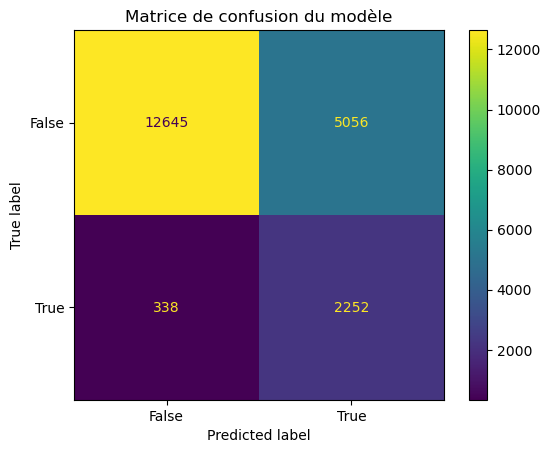


===== Modèle : Ridge =====
AUC moyenne (CV=5) : 0.837 ± 0.003

Rapport de classification :
              precision    recall  f1-score   support

       False       0.98      0.68      0.80     17701
        True       0.30      0.92      0.45      2590

    accuracy                           0.71     20291
   macro avg       0.64      0.80      0.63     20291
weighted avg       0.89      0.71      0.76     20291



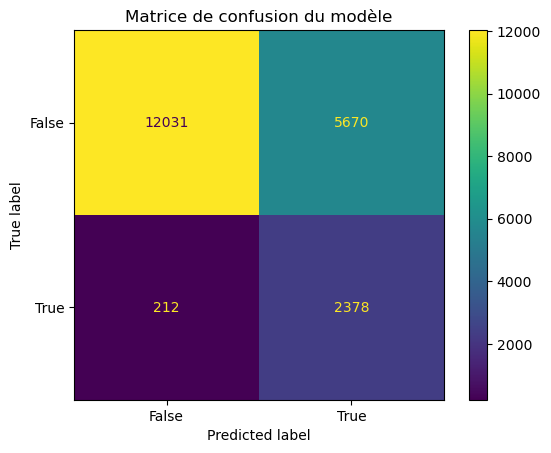


===== Modèle : ElasticNet =====
AUC moyenne (CV=5) : 0.834 ± 0.003

Rapport de classification :
              precision    recall  f1-score   support

       False       0.97      0.73      0.83     17701
        True       0.31      0.83      0.45      2590

    accuracy                           0.74     20291
   macro avg       0.64      0.78      0.64     20291
weighted avg       0.88      0.74      0.78     20291



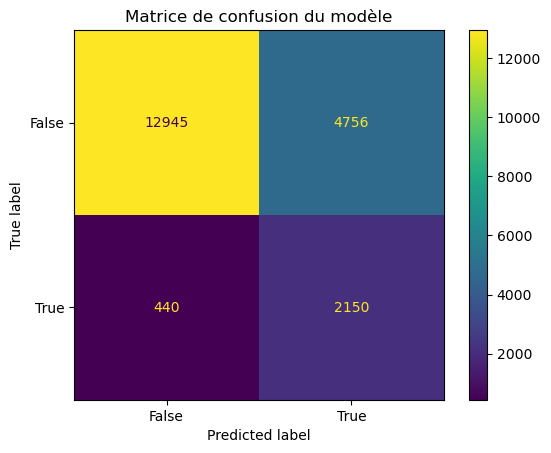


===== Modèle : DecisionTree =====
AUC moyenne (CV=5) : 0.878 ± 0.002

Rapport de classification :
              precision    recall  f1-score   support

       False       0.99      0.71      0.83     17701
        True       0.32      0.97      0.49      2590

    accuracy                           0.74     20291
   macro avg       0.66      0.84      0.66     20291
weighted avg       0.91      0.74      0.78     20291



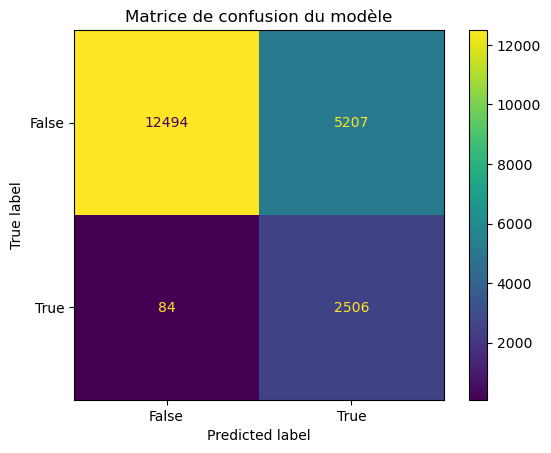


===== Modèle : RandomForest =====
AUC moyenne (CV=5) : 0.921 ± 0.002

Rapport de classification :
              precision    recall  f1-score   support

       False       0.92      0.97      0.94     17701
        True       0.67      0.45      0.54      2590

    accuracy                           0.90     20291
   macro avg       0.80      0.71      0.74     20291
weighted avg       0.89      0.90      0.89     20291



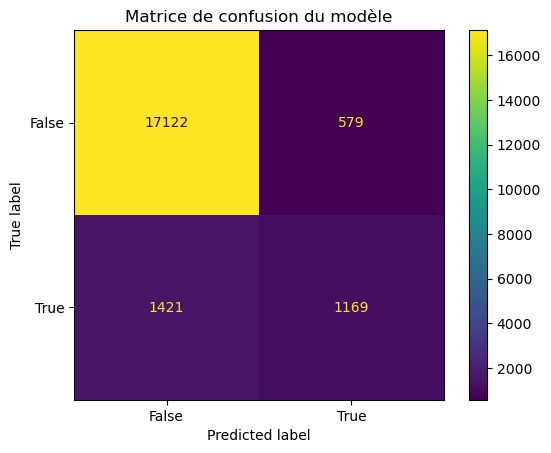

In [15]:
# Validation croisée stratifiée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # cette fonction permet de conserver les proportions dans les données

for name, model in models.items():
    print(f"\n===== Modèle : {name} =====")

    # Pipeline standardisation + modèle
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])

    # Calcul de l’AUC moyenne via cross-validation
    auc_scores = cross_val_score(
        pipeline, X_train, y_train,
        cv=cv, scoring='roc_auc'
    )
    
    print(f"AUC moyenne (CV=5) : {np.mean(auc_scores):.3f} ± {np.std(auc_scores):.3f}")
    
    # Entraînement final sur tout le train
    pipeline.fit(X_train, y_train)
    
    # Évaluation sur test
    y_pred = pipeline.predict(X_test)

    if hasattr(pipeline, "predict_proba"):
        y_proba = pipeline.predict_proba(X_test)[:, 1]
    else:
        y_proba = pipeline.decision_function(X_test)
    
    print("\nRapport de classification :")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])
    disp.plot()
    plt.title("Matrice de confusion du modèle")
    plt.show()
    
    # auc = roc_auc_score(y_test, y_proba)
    # print(f"AUC (test) : {auc:.3f}")

Il était initialement prévu de tester le **SVM**, mais en raison d’un temps de calcul trop important sur ma machine, il n’a pas été possible d’évaluer pleinement ses performances. Il a donc été décidé de ne calculer que l’**AUC** pour ce modèle.

On observe que l’entraînement avec des classes pondérées améliore sensiblement les performances du modèle **LogisticRegression**.

En revanche, le **RandomForest** se distingue par des résultats nettement supérieurs à ceux des autres modèles. Cette approche ensembliste permet une meilleure classification des données, notamment lorsque l’on se base sur le **F1-score** et la moyenne de l’**AUC** (cv=5).

Cependant, il est intéressant de noter que le rappel (recall) du **RandomForest** n’est pas le plus élevé : un arbre de décision simple semble légèrement plus performant sur cette métrique.

In [75]:
svm_fast = SVC(kernel='rbf', class_weight='balanced') 

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', svm_fast)
])

auc_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print(f"SVM (rapide) — AUC moyenne (CV=5) : {np.mean(auc_scores):.3f} ± {np.std(auc_scores):.3f}")

SVM (rapide) — AUC moyenne (CV=5) : 0.863 ± 0.004


La performance du **SVM** sur l'**AUC** ne semble pas meilleur que celle des autres modèles déjà testés. 

Nous pouvons soit privilégier un modèle présentant un **rappel** élevé et chercher à améliorer sa précision afin de réduire les faux positifs, soit adopter l’approche inverse.

Dans notre cas, il semble préférable de maximiser la détection des objets dangereux, quitte à tolérer davantage de **faux positifs**. Nous allons donc chercher à améliorer le **F1-score**, en faisant attention au **rappel**.

## Optimisation

### Déséquilibre des classes

`SMOTE` (Synthetic Minority Over-sampling Technique) est une méthode qui permet de rééquilibrer des jeux de données déséquilibrés en générant des **échantillons synthétiques** pour la **classe minoritaire**. Nous allons étudier l’impact de cette méthode sur les performances d’apprentissage de nos modèles.

In [80]:
# pip install imbalanced-learn

In [12]:
from imblearn.over_sampling import SMOTE

In [14]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [15]:
models = {
    'DecisionTree': DecisionTreeClassifier(max_depth=10, class_weight='balanced', random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
}


===== Modèle : DecisionTree avec SMOTE =====
Rapport de classification :
              precision    recall  f1-score   support

       False       0.99      0.73      0.84     17701
        True       0.34      0.92      0.49      2590

    accuracy                           0.76     20291
   macro avg       0.66      0.83      0.67     20291
weighted avg       0.90      0.76      0.80     20291

AUC (test) : 0.880


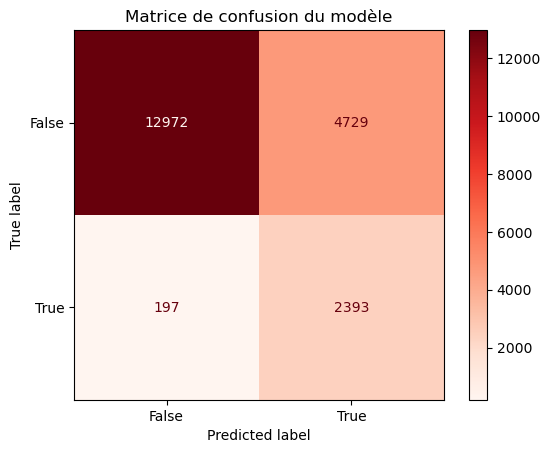


===== Modèle : RandomForest avec SMOTE =====
Rapport de classification :
              precision    recall  f1-score   support

       False       0.94      0.94      0.94     17701
        True       0.59      0.62      0.60      2590

    accuracy                           0.90     20291
   macro avg       0.77      0.78      0.77     20291
weighted avg       0.90      0.90      0.90     20291

AUC (test) : 0.931


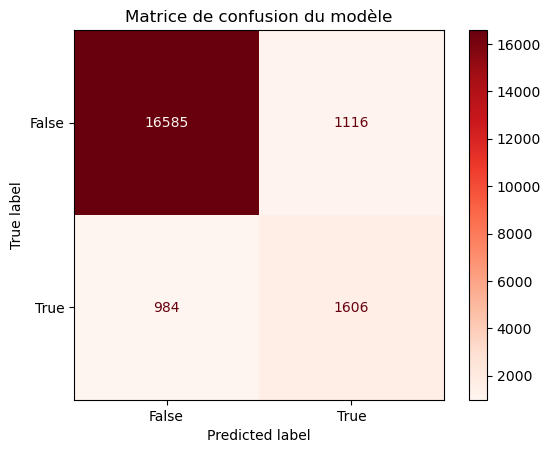

In [16]:
for name, model in models.items():
    print(f"\n===== Modèle : {name} avec SMOTE =====")

    # Pipeline avec normalisation + modèle
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])


    pipeline.fit(X_train_smote, y_train_smote)

    y_pred = pipeline.predict(X_test)
    if hasattr(pipeline, "predict_proba"):
        y_proba = pipeline.predict_proba(X_test)[:, 1]
    else:
        y_proba = pipeline.decision_function(X_test)

    # Évaluation
    print("Rapport de classification :")
    print(classification_report(y_test, y_pred))
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC (test) : {auc:.3f}")
    cm = confusion_matrix(y_test, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])
    disp.plot(cmap="Reds")
    plt.title("Matrice de confusion du modèle")
    plt.show()

Cela semble avoir améliorer uniquement le **RandomForest**, qui est bien plus performant après ce rééquilibrage de classe. L'amélioration est significative car supérieur à 10^-2 pour le RandomForest.

#### En voyant plus d'élément de la base de données

Maintenant que nous avons moins de modèles à entraîner, nous allons étudier l’impact de l’augmentation du nombre de données utilisées lors de l’entraînement.

In [96]:
X = df_clean.drop(columns=["neo_id", "name", "is_hazardous","orbiting_body"])
y = df_clean["is_hazardous"]

In [100]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [109]:
def test_pct_bd(X, y, size):
    if size != 1:
        X_small, _, y_small, _ = train_test_split(X, y, train_size=size, random_state=42, stratify=y)
        X_train_diff, X_test_diff, y_train_diff, y_test_diff = train_test_split(X_small, y_small, test_size=0.2, random_state=42, stratify=y_small)
    else:
         X_train_diff, X_test_diff, y_train_diff, y_test_diff = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    results = {}
    
    for name, model in models.items():
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('clf', model)
        ])
        
        pipeline.fit(X_train_diff, y_train_diff)
        y_pred = pipeline.predict(X_test_diff)
        
        precision = precision_score(y_test_diff, y_pred, pos_label=True)
        recall = recall_score(y_test_diff, y_pred, pos_label=True)
        f1 = f1_score(y_test_diff, y_pred, pos_label=True)
        
        results[name] = {
            'precision_true': precision,
            'recall_true': recall,
            'f1_true': f1
        }
    
    return results

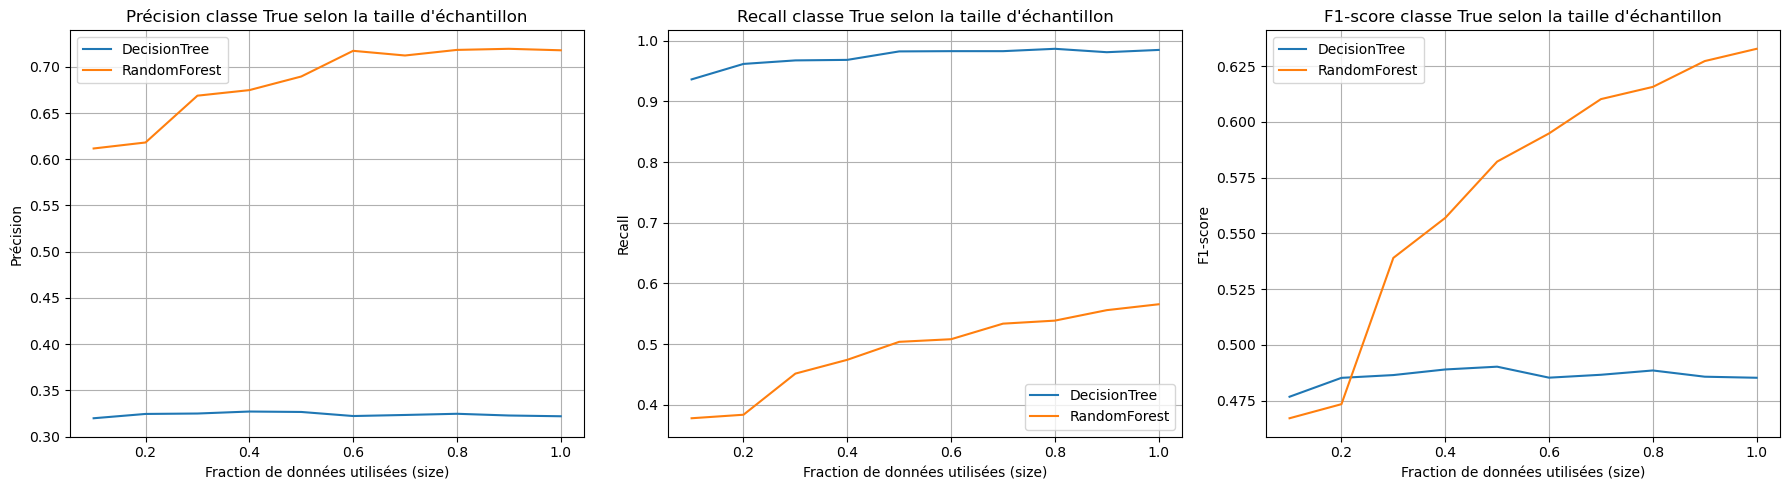

In [111]:
sizes = np.linspace(0.1, 1.0, 10)

results_by_size = {model: {'precision_true': [], 'recall_true': [], 'f1_true': []} for model in models.keys()}

for size in sizes:
    metrics = test_pct_bd(X, y, size)
    for model_name, scores in metrics.items():
        results_by_size[model_name]['precision_true'].append(scores['precision_true'])
        results_by_size[model_name]['recall_true'].append(scores['recall_true'])
        results_by_size[model_name]['f1_true'].append(scores['f1_true'])



plt.figure(figsize=(18, 5))

# Précision
plt.subplot(1, 3, 1)
for model_name, metrics_dict in results_by_size.items():
    plt.plot(sizes, metrics_dict['precision_true'], label=model_name)
plt.title("Précision classe True selon la taille d'échantillon")
plt.xlabel("Fraction de données utilisées (size)")
plt.ylabel("Précision")
plt.legend()
plt.grid(True)

# Recall
plt.subplot(1, 3, 2)
for model_name, metrics_dict in results_by_size.items():
    plt.plot(sizes, metrics_dict['recall_true'], label=model_name)
plt.title("Recall classe True selon la taille d'échantillon")
plt.xlabel("Fraction de données utilisées (size)")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)

# F1-score
plt.subplot(1, 3, 3)
for model_name, metrics_dict in results_by_size.items():
    plt.plot(sizes, metrics_dict['f1_true'], label=model_name)
plt.title("F1-score classe True selon la taille d'échantillon")
plt.xlabel("Fraction de données utilisées (size)")
plt.ylabel("F1-score")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

La fraction de données semble réellement avoir un impact sur la performance de **RandomRorest**, beaucoup moins pour l'arbre de décision. Nous allons maintenant utiliser uniquement le **RandomForest** avec toute la base de données et en utilisant `SMOTE`, qui semble maintenant avoir une bien meilleure performance.

#### Test avec SMOTE et toute la base de données

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Rapport de classification :
              precision    recall  f1-score   support

       False       0.95      0.95      0.95     59002
        True       0.67      0.66      0.66      8633

    accuracy                           0.92     67635
   macro avg       0.81      0.81      0.81     67635
weighted avg       0.91      0.92      0.91     67635

AUC (test) : 0.947


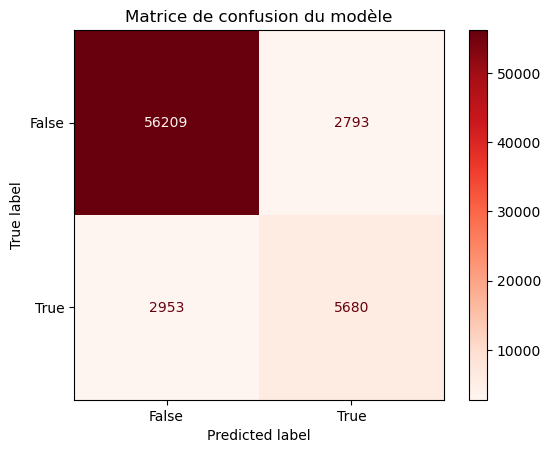

In [20]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])

pipeline.fit(X_train_smote, y_train_smote)

y_pred = pipeline.predict(X_test)
if hasattr(pipeline, "predict_proba"):
    y_proba = pipeline.predict_proba(X_test)[:, 1]
else:
    y_proba = pipeline.decision_function(X_test)

# Évaluation
print("Rapport de classification :")
print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_proba)
print(f"AUC (test) : {auc:.3f}")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])
disp.plot(cmap="Reds")
plt.title("Matrice de confusion du modèle")
plt.show()

## Optimisation des hyperparamètres avec optuna

In [44]:
import optuna

In [45]:
def objective(trial):
    """L'objectif est de calculer des performances prenant à la fois le rappel et le f1-score"""
    # Hyperparamètres
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 30)

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,
                                      class_weight='balanced',random_state=42 ))])

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    
    recalls = []
    f1s = []
    for train_idx, val_idx in cv.split(X_train_smote, y_train_smote):
        X_train_cv, X_val_cv = X_train_smote.iloc[train_idx], X_train_smote.iloc[val_idx]
        y_train_cv, y_val_cv = y_train_smote.iloc[train_idx], y_train_smote.iloc[val_idx]

        pipeline.fit(X_train_cv, y_train_cv)
        y_pred = pipeline.predict(X_val_cv)
        
        recalls.append(recall_score(y_val_cv, y_pred, pos_label=True))
        f1s.append(f1_score(y_val_cv, y_pred, pos_label=True))
    
    mean_recall = sum(recalls) / len(recalls)
    mean_f1 = sum(f1s) / len(f1s)
    
    alpha = 0.65  
    composite_score = alpha * mean_recall + (1 - alpha) * mean_f1
    
    return composite_score

In [127]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)  # 10 essais d'optimisation

print("Meilleurs hyperparamètres :")
print(study.best_params)

best_params = study.best_params

[I 2025-11-02 13:50:09,230] A new study created in memory with name: no-name-4ff0aae6-b681-4971-89ea-900ef3a83257
[I 2025-11-02 14:01:11,774] Trial 0 finished with value: 0.9500661113572392 and parameters: {'n_estimators': 183, 'max_depth': 23}. Best is trial 0 with value: 0.9500661113572392.
[I 2025-11-02 14:16:12,594] Trial 1 finished with value: 0.9498717840113613 and parameters: {'n_estimators': 233, 'max_depth': 25}. Best is trial 0 with value: 0.9500661113572392.
[I 2025-11-02 14:22:34,748] Trial 2 finished with value: 0.9500457756524696 and parameters: {'n_estimators': 116, 'max_depth': 16}. Best is trial 0 with value: 0.9500661113572392.
[I 2025-11-02 14:24:50,987] Trial 3 finished with value: 0.9468048448187675 and parameters: {'n_estimators': 152, 'max_depth': 3}. Best is trial 0 with value: 0.9500661113572392.
[I 2025-11-02 14:40:45,441] Trial 4 finished with value: 0.9498709722514008 and parameters: {'n_estimators': 269, 'max_depth': 24}. Best is trial 0 with value: 0.95006

Meilleurs hyperparamètres :
{'n_estimators': 61, 'max_depth': 21}


In [23]:
best_params = {'n_estimators': 61, 'max_depth': 21}

Rapport de classification (modèle optimisé):
              precision    recall  f1-score   support

       False       0.97      0.84      0.90     59002
        True       0.44      0.84      0.57      8633

    accuracy                           0.84     67635
   macro avg       0.70      0.84      0.74     67635
weighted avg       0.90      0.84      0.86     67635

AUC (test) : 0.920


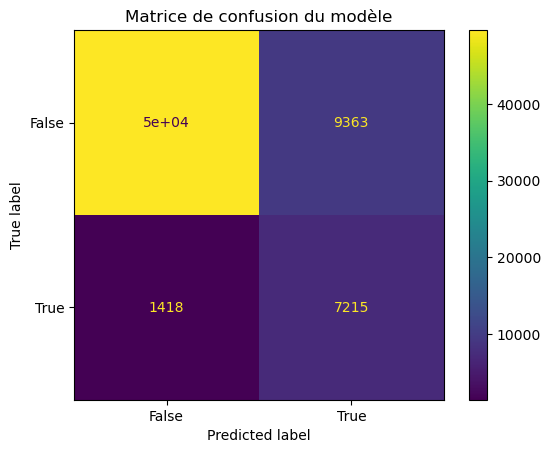

In [24]:
pipeline_optimized = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(
        **best_params,  # **best_params
        class_weight='balanced',
        random_state=42
    ))
])

pipeline_optimized.fit(X_train_smote, y_train_smote)

# Évaluation sur test
y_pred = pipeline_optimized.predict(X_test)
y_proba = pipeline_optimized.predict_proba(X_test)[:, 1]

print("Rapport de classification (modèle optimisé):")
print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_proba)
print(f"AUC (test) : {auc:.3f}")

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])
disp.plot()
plt.title("Matrice de confusion du modèle")
plt.show()

Il est possible que la performance relativement faible du modèle soit liée à la présence d’outliers dans les données.
Ces observations atypiques peuvent avoir un impact significatif sur l’apprentissage, en particulier pour les modèles sensibles aux variations extrêmes. Elles peuvent fausser la distribution des variables, modifier les frontières de décision ou influencer excessivement certaines métriques d’évaluation.

### Test de détection d'outliers

In [37]:
def handle_outliers(X):
    X_clean = X.copy()
    numeric_cols = X_clean.select_dtypes(include=['float64', 'int64']).columns

    for col in numeric_cols:
        Q1 = X_clean[col].quantile(0.10)
        Q3 = X_clean[col].quantile(0.90)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        
        X_clean = X_clean[(X_clean[col] >= lower_bound) & (X_clean[col] <= upper_bound)]

    return X_clean

La fonction `handle_outliers` permet de supprimer les valeurs aberrantes des variables numériques.
Pour chaque colonne, les bornes sont calculées à partir des quantiles 10 % et 90 %, puis élargies de 1,5 fois l’intervalle interquantile (IQR).

In [38]:
X_clean = handle_outliers(X)

In [39]:
def plot_boxplots(df):
    numeric_cols = df.select_dtypes(include='number').columns
    n_cols = 3
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calcul automatique du nombre de lignes

    plt.figure(figsize=(15, n_rows * 4))

    for i, feature in enumerate(numeric_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(data=df, x=feature, color='skyblue')
        plt.title(feature, fontsize=12)
        plt.xlabel('')
        plt.ylabel('')

    plt.tight_layout()
    plt.show()

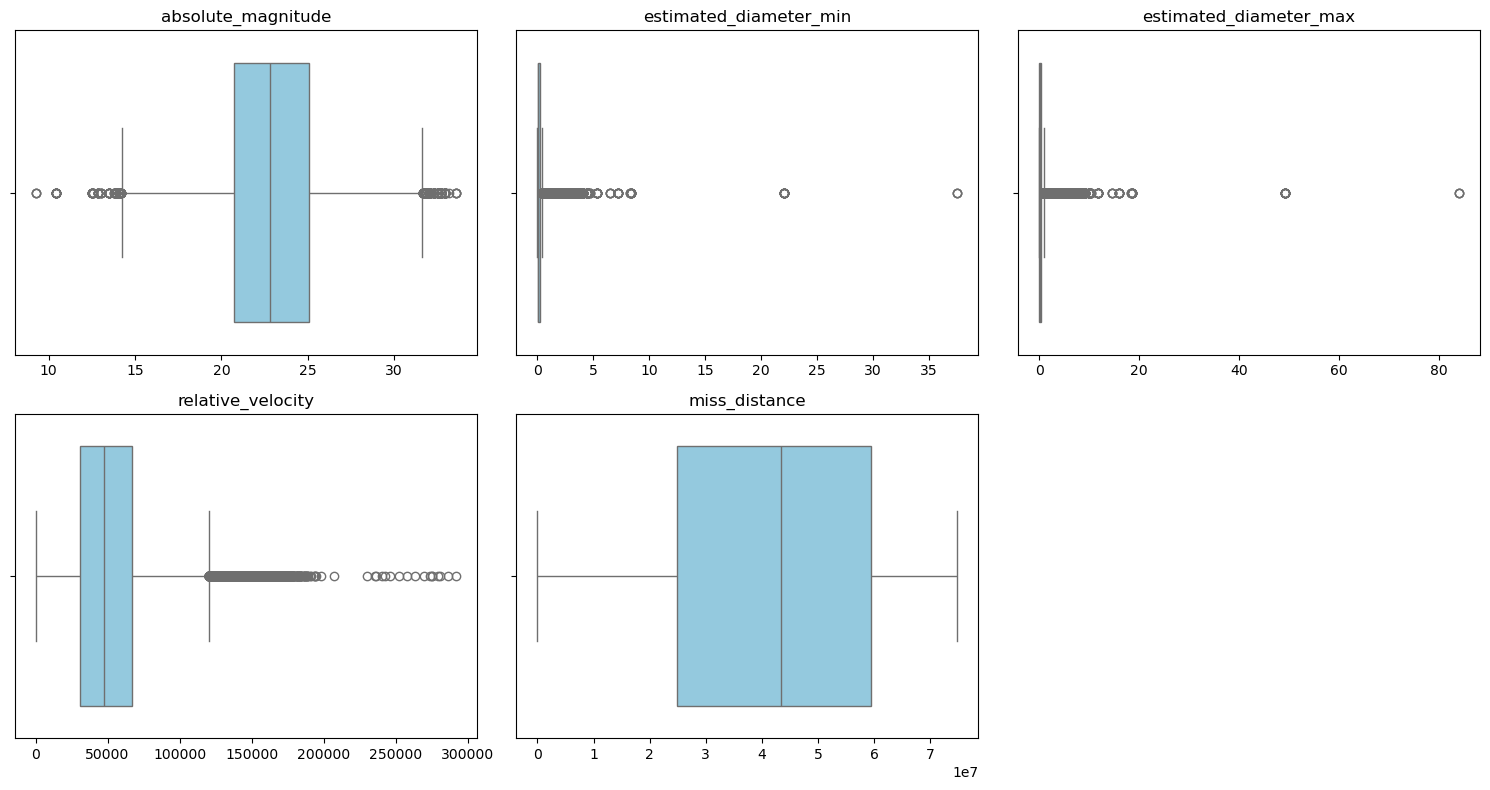

In [40]:
plot_boxplots(X)

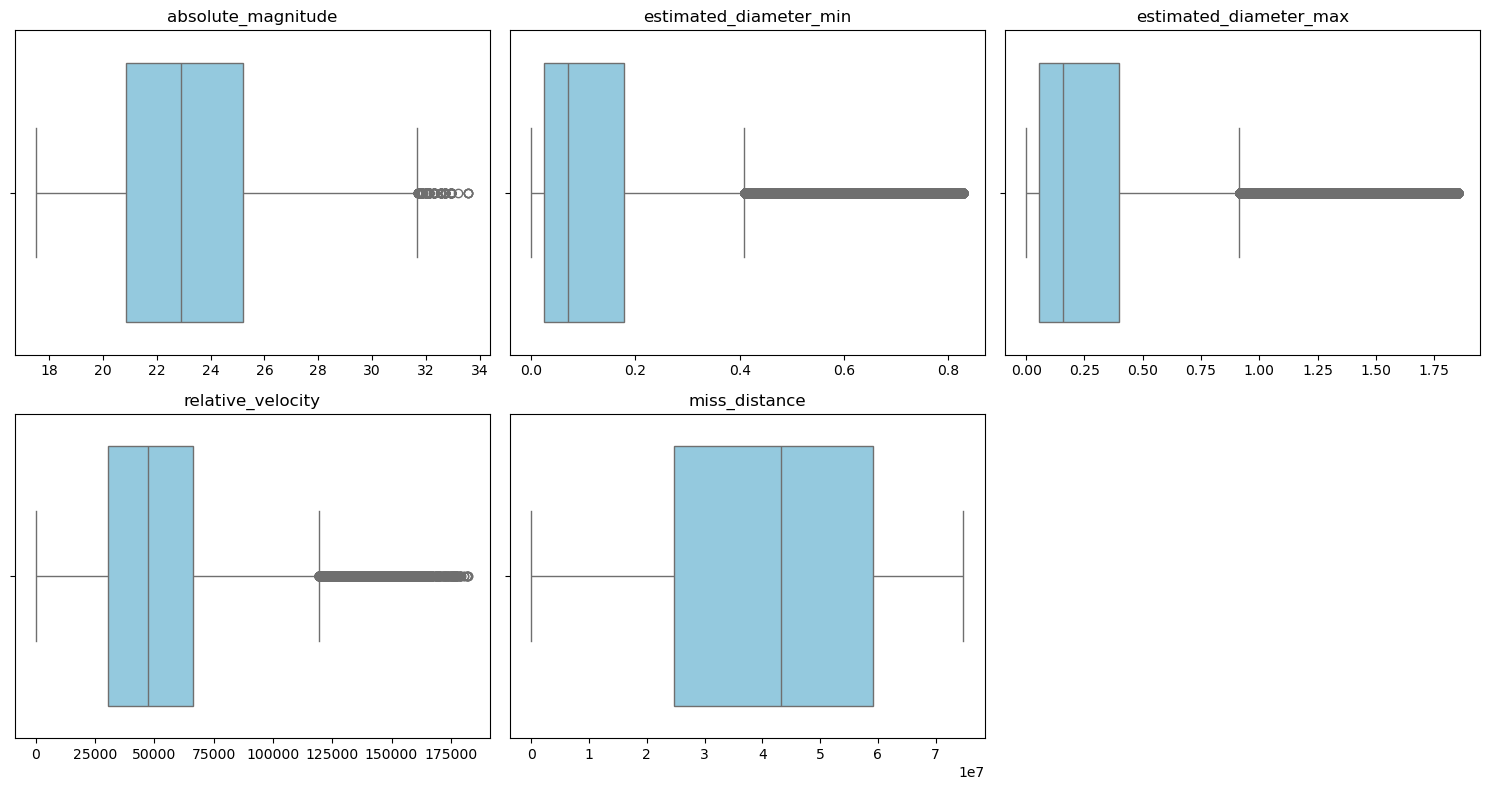

In [41]:
plot_boxplots(X_clean)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Rapport de classification :
              precision    recall  f1-score   support

       False       0.95      0.95      0.95     59002
        True       0.67      0.66      0.66      8633

    accuracy                           0.92     67635
   macro avg       0.81      0.81      0.81     67635
weighted avg       0.91      0.92      0.91     67635

AUC (test) : 0.947


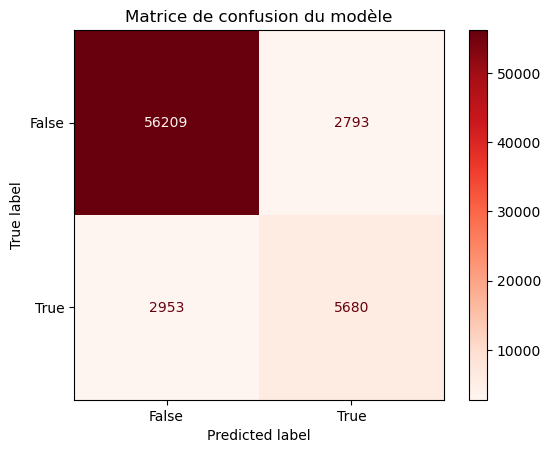

In [43]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])

pipeline.fit(X_train_smote, y_train_smote)

y_pred = pipeline.predict(X_test)
if hasattr(pipeline, "predict_proba"):
    y_proba = pipeline.predict_proba(X_test)[:, 1]
else:
    y_proba = pipeline.decision_function(X_test)

# Évaluation
print("Rapport de classification :")
print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_proba)
print(f"AUC (test) : {auc:.3f}")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])
disp.plot(cmap="Reds")
plt.title("Matrice de confusion du modèle")
plt.show()

Après le retrait des outliers, le modèle présente une meilleure performance sur la classe **True**, avec une augmentation du **F1-score** (0.66) et un **rappel** plus élevé (0.66). Cela indique que le modèle détecte désormais plus efficacement les observations positives, tout en maintenant un bon équilibre entre précision et rappel. On peut donc réssayer une optimisation avec **optuna**.

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [48]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)  # 5 essais d'optimisation

print("Meilleurs hyperparamètres :")
print(study.best_params)

best_params = study.best_params

[I 2025-11-03 22:51:56,991] A new study created in memory with name: no-name-094e862e-1020-4b53-b5dc-fcdca3c114d4
[I 2025-11-03 23:04:49,833] Trial 0 finished with value: 0.9500698058405477 and parameters: {'n_estimators': 248, 'max_depth': 17}. Best is trial 0 with value: 0.9500698058405477.
[I 2025-11-03 23:16:34,453] Trial 1 finished with value: 0.9500153715140427 and parameters: {'n_estimators': 224, 'max_depth': 17}. Best is trial 0 with value: 0.9500698058405477.
[I 2025-11-03 23:25:00,622] Trial 2 finished with value: 0.9499856182268233 and parameters: {'n_estimators': 168, 'max_depth': 16}. Best is trial 0 with value: 0.9500698058405477.
[I 2025-11-03 23:39:09,616] Trial 3 finished with value: 0.9499332188554481 and parameters: {'n_estimators': 277, 'max_depth': 16}. Best is trial 0 with value: 0.9500698058405477.
[I 2025-11-03 23:51:02,209] Trial 4 finished with value: 0.9497500669216998 and parameters: {'n_estimators': 201, 'max_depth': 24}. Best is trial 0 with value: 0.9500

Meilleurs hyperparamètres :
{'n_estimators': 248, 'max_depth': 17}


Rapport de classification (modèle optimisé):
              precision    recall  f1-score   support

       False       0.98      0.79      0.88     59002
        True       0.38      0.89      0.54      8633

    accuracy                           0.80     67635
   macro avg       0.68      0.84      0.71     67635
weighted avg       0.90      0.80      0.83     67635

AUC (test) : 0.906


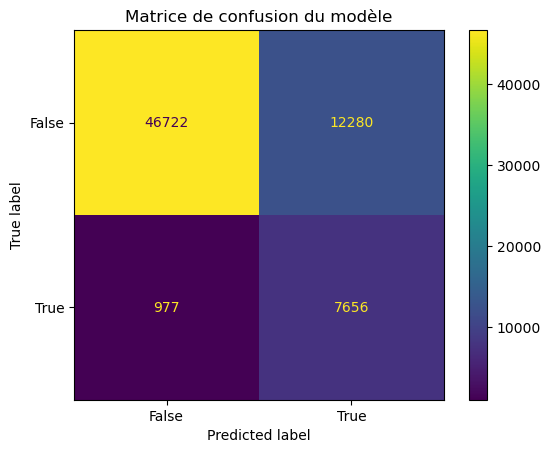

In [49]:
pipeline_optimized = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(
        **best_params,  # **best_params
        class_weight='balanced',
        random_state=42
    ))
])

pipeline_optimized.fit(X_train_smote, y_train_smote)

# Évaluation sur test
y_pred = pipeline_optimized.predict(X_test)
y_proba = pipeline_optimized.predict_proba(X_test)[:, 1]

print("Rapport de classification (modèle optimisé):")
print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_proba)
print(f"AUC (test) : {auc:.3f}")

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])
disp.plot()
plt.title("Matrice de confusion du modèle")
plt.show()

L'optimisation ne semble pas avoir permis de trouver un meilleur modèle. Le rappel est certes supérieur, mais le F1-score sur la classe minoritaire est beaucoup plus faible. En revanche, le rappel est bien meilleur (0.89). On pourrait envisager d'enlever plus de données jugées comme outliers en prenant Q1 à 20 % et Q3 à 80 %. Cela pourrait permettre d'améliorer les performances.
Il est aussi possible qu'une autre méthode de calcul de `composite_score` permette de mieux sélectionner le modèle.